In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from cv2.gapi import BGR2Gray

In [ ]:
def unpackSIFTOctave(kpt):
    """unpackSIFTOctave(kpt)->(octave,layer,scale)
    @created by Silencer at 2018.01.23 11:12:30 CST
    @brief Unpack Sift Keypoint by Silencer
    @param kpt: cv2.KeyPoint (of SIFT)
    """
    _octave = kpt.octave
    octave = _octave & 0xFF
    layer = (_octave >> 8) & 0xFF
    if octave >= 128:
        octave |= -128
    if octave >= 0:
        scale = float(1 / (1 << octave))
    else:
        scale = float(1 << -octave)
    return octave, layer, scale

In [ ]:
data_path = 'drive/MyDrive/PR201910840/images/'

In [ ]:
img1 = cv2.imread(data_path+"lab07/book1.png")
img2 = cv2.imread(data_path+"lab07/book2.png")

In [ ]:
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [ ]:
img1_rotate = cv2.rotate(img1, cv2.ROTATE_90_COUNTERCLOCKWISE)
img1_resize = cv2.resize(img1 ,(500,500))

In [ ]:
sift = cv2.SIFT_create()

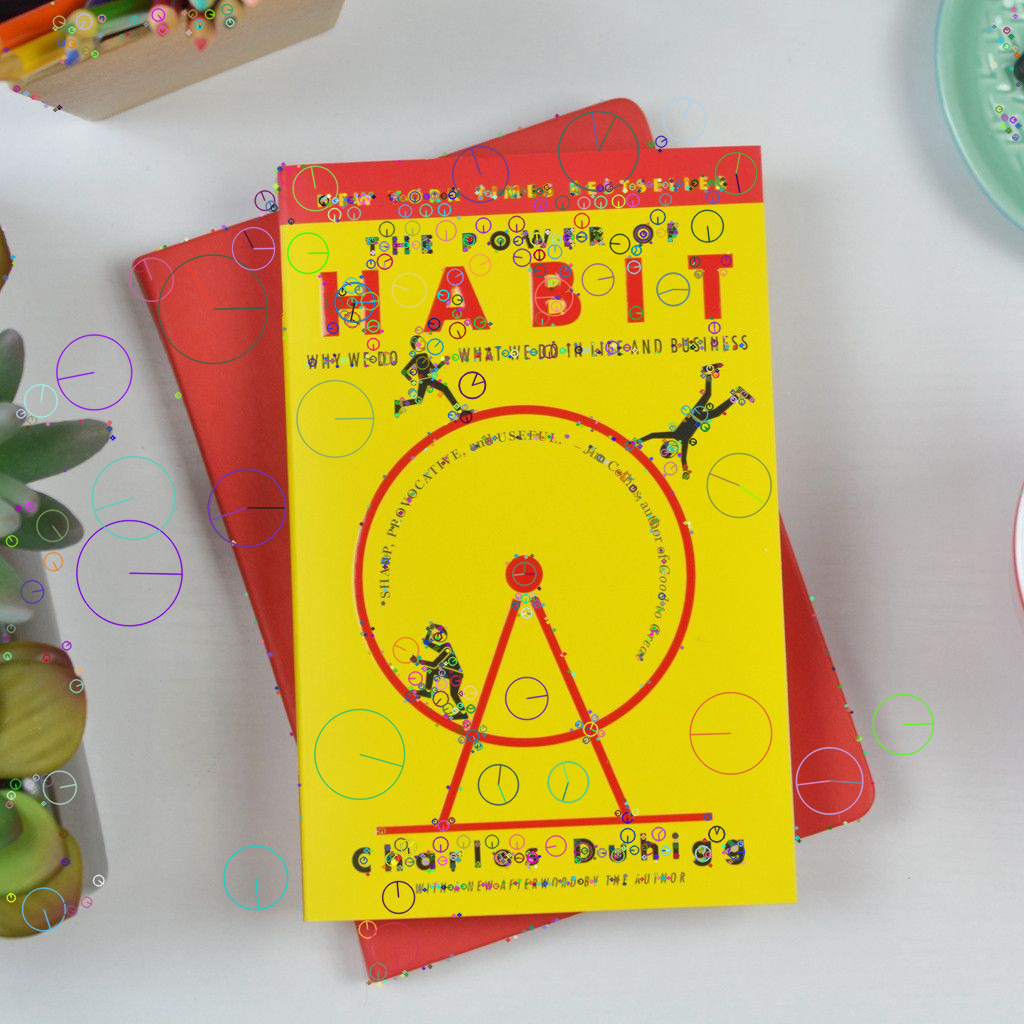

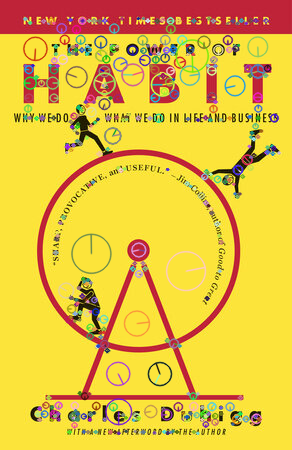

In [ ]:
keypoints1, descriptor1  = sift.detectAndCompute(gray1, None)
keypoints2, descriptor2  = sift.detectAndCompute(gray2, None)

result1 = cv2.drawKeypoints(img1, keypoints1, outImage=None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
result2 = cv2.drawKeypoints(img2, keypoints2, outImage=None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2_imshow(result1)
cv2_imshow(result2)

In [ ]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = True)
matches = bf.match(descriptor1, descriptor2)

In [ ]:
matches = sorted(matches, key =lambda x: x.distance)
matched_img =cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:50], None, flags=2)

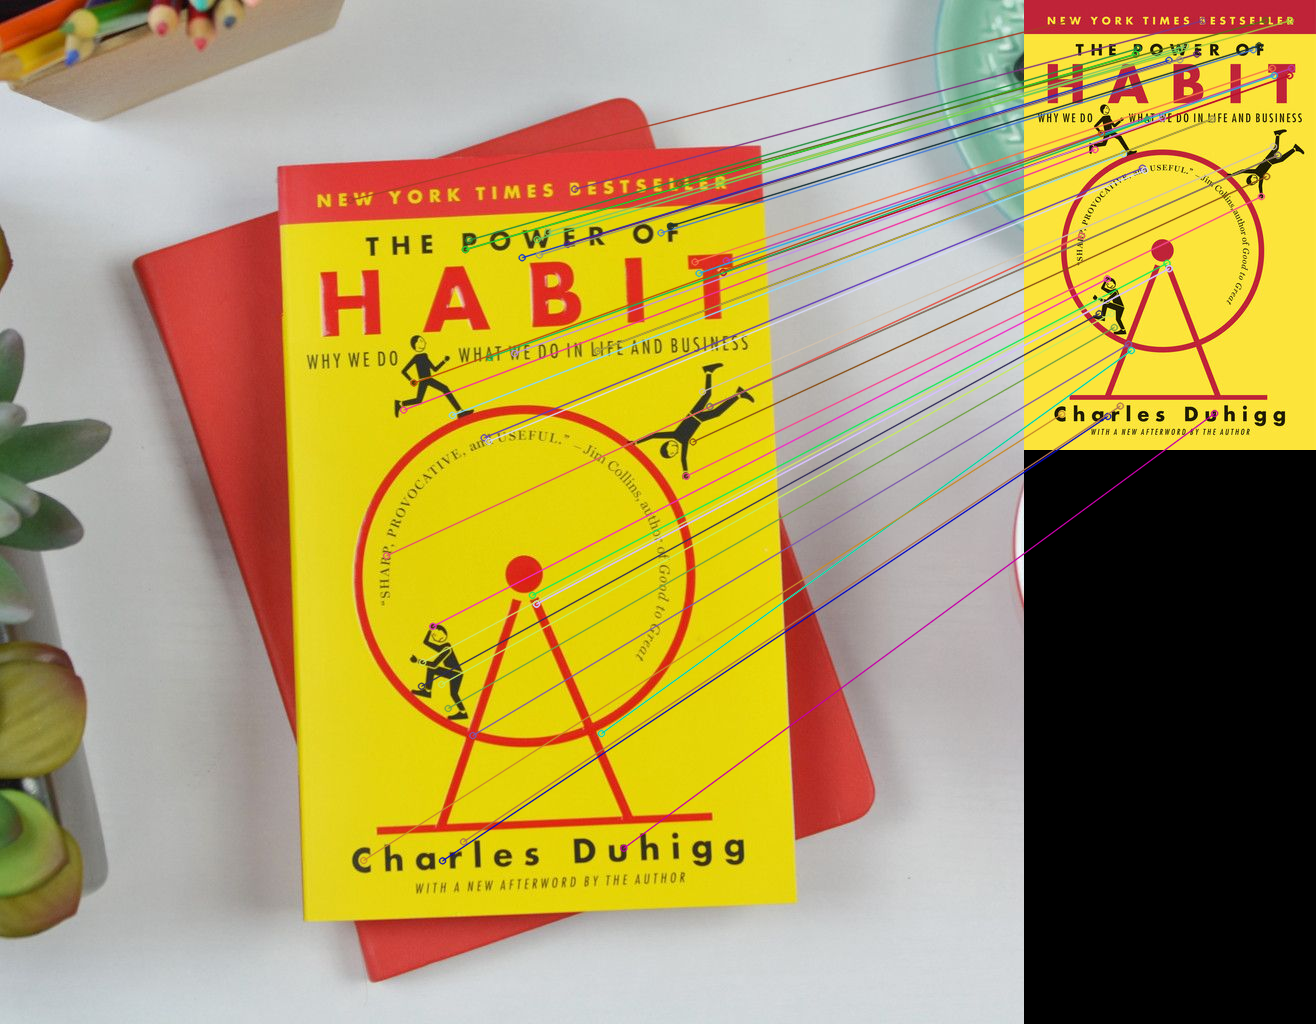

In [ ]:
cv2_imshow(matched_img)

In [ ]:
gray3 = cv2.cvtColor(img1_rotate, cv2.COLOR_BGR2GRAY)
gray4 = cv2.cvtColor(img1_resize, cv2.COLOR_BGR2GRAY)

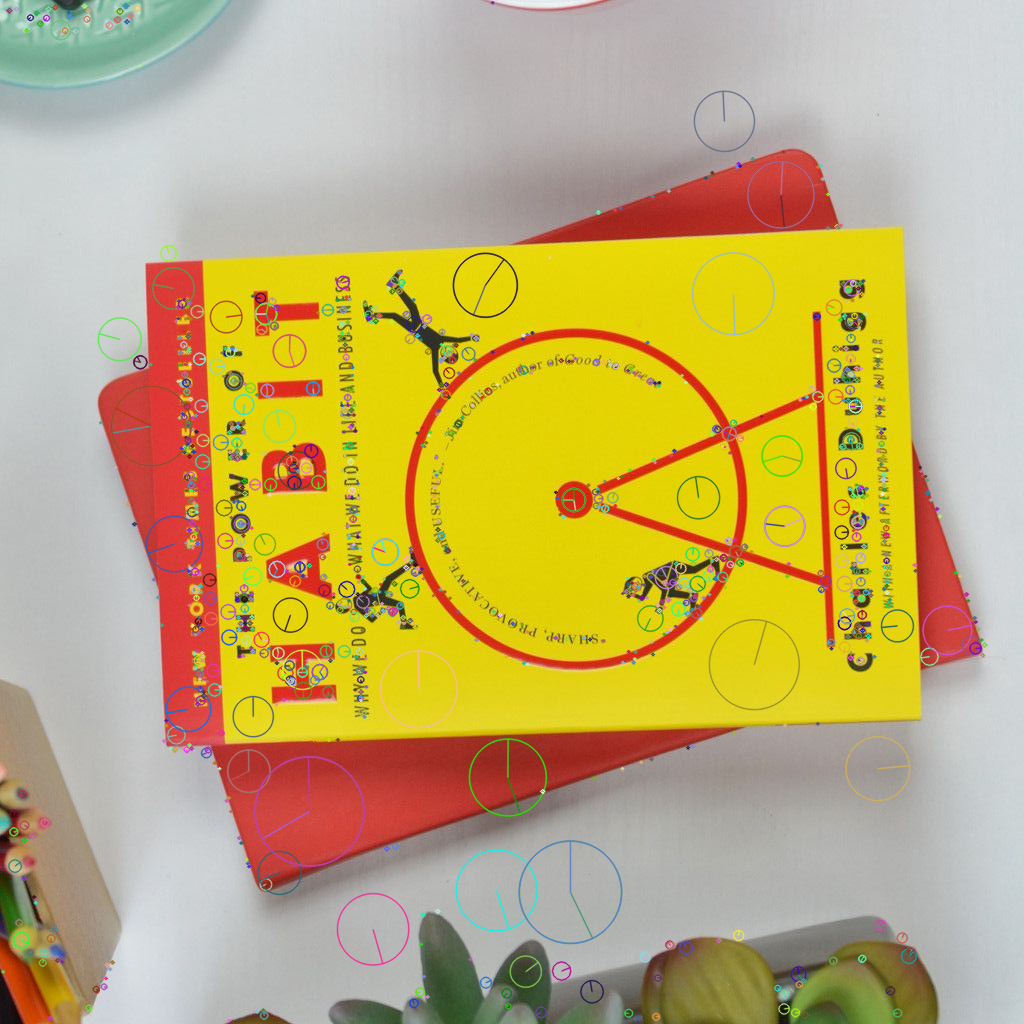

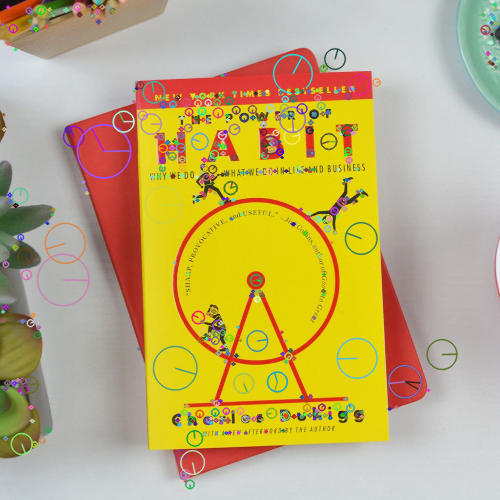

In [ ]:
keypoints3, descriptor3  = sift.detectAndCompute(gray3, None)
keypoints4, descriptor4  = sift.detectAndCompute(gray4, None)


result3 = cv2.drawKeypoints(img1_rotate, keypoints3, outImage=None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
result4 = cv2.drawKeypoints(img1_resize, keypoints4, outImage=None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


cv2_imshow(result3)
cv2_imshow(result4)

In [ ]:
bf2 = cv2.BFMatcher(cv2.NORM_L1, crossCheck = True)
matches2 = bf.match(descriptor3, descriptor2)

In [ ]:
matches2 = sorted(matches2, key =lambda x: x.distance)
matched_img2 =cv2.drawMatches(img1_rotate, keypoints3, img2, keypoints2, matches2[:50], None, flags=2)

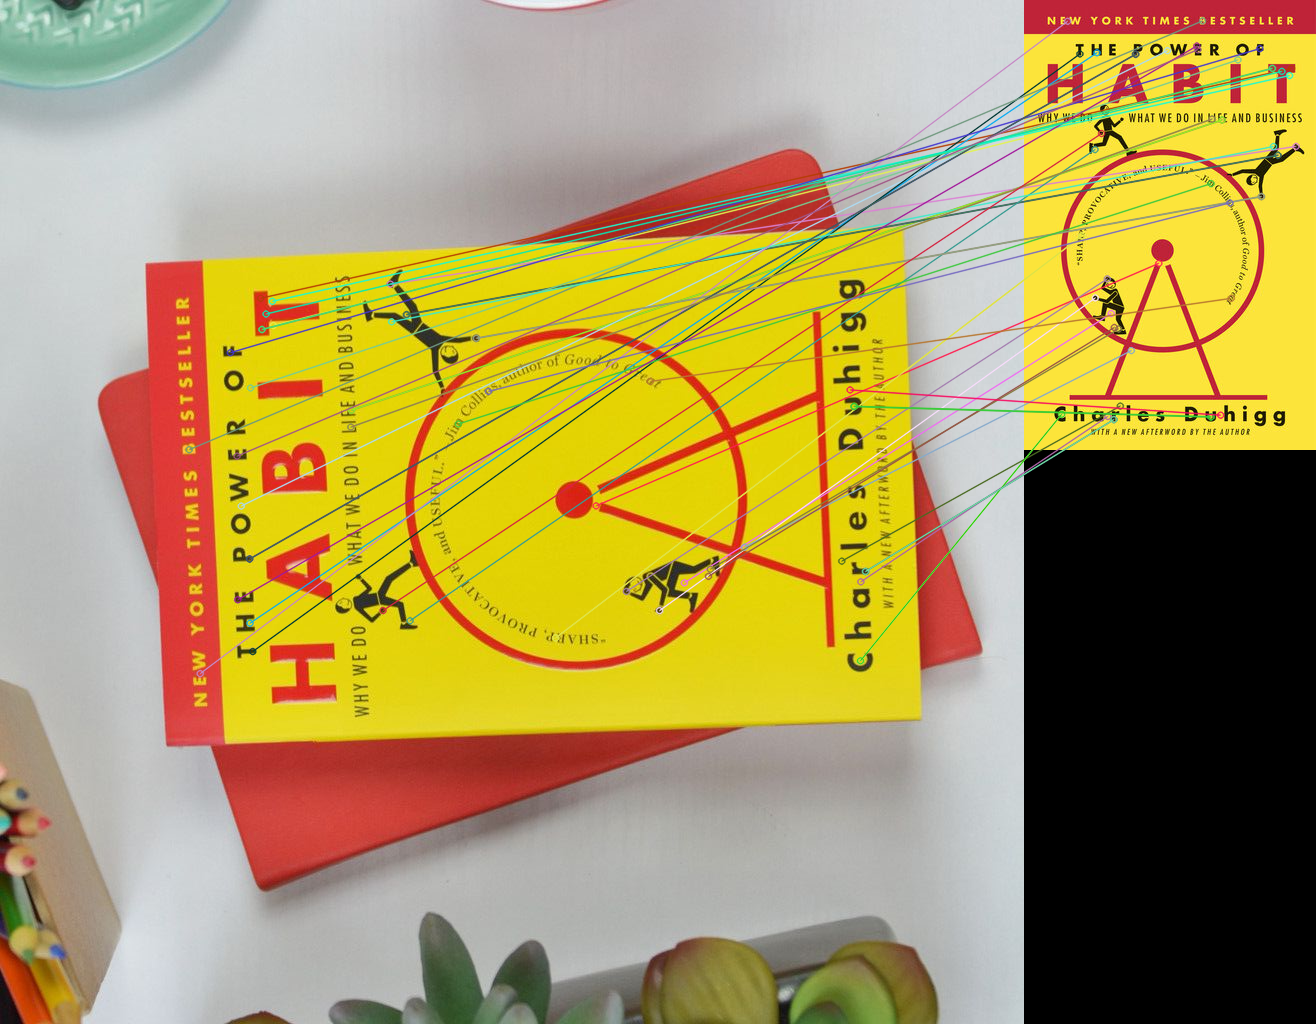

In [ ]:
cv2_imshow(matched_img2)

In [ ]:
bf3 = cv2.BFMatcher(cv2.NORM_L1, crossCheck = True)
matches3 = bf.match(descriptor4, descriptor2)

In [ ]:
matches3 = sorted(matches3, key =lambda x: x.distance)
matched_img3 =cv2.drawMatches(img1_resize, keypoints4, img2, keypoints2, matches3[:50], None, flags=2)

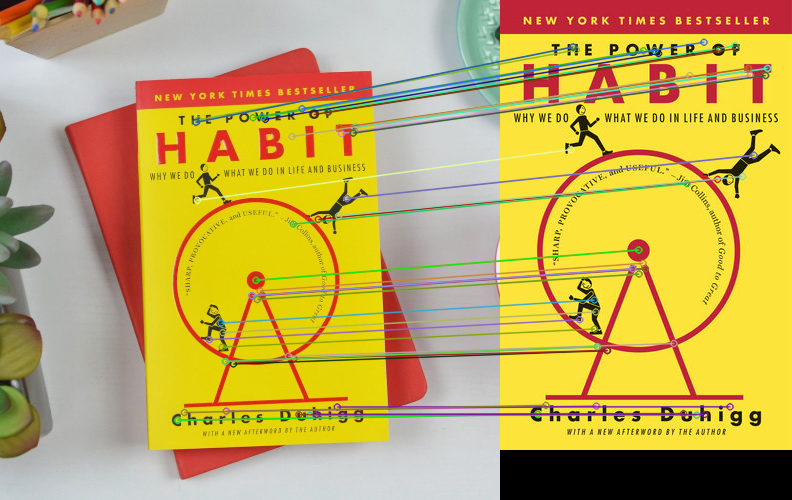

In [ ]:
cv2_imshow(matched_img3)